In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import os
from io import StringIO
from sklearn import tree
from os import system
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Create Dataset

In [3]:
x, y = datasets.make_classification(n_samples=1000, n_features=10,  flip_y=0.5)

Build Simple Model

In [4]:
#fit model
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
#make prediction
preds = dt.predict(x)

In [6]:
(y == preds).mean()

1.0

# Handle depth issue
### Conclusion: Higher depth has a lower performance in testing dataset

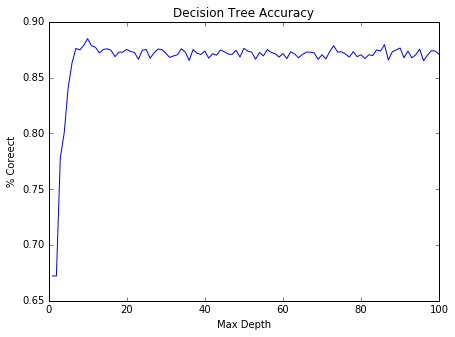

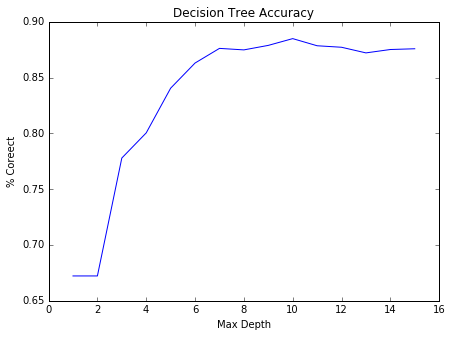

In [71]:
np.random.seed(0)

n_features = 100
x, y = datasets.make_classification(10000, n_features=n_features, n_informative=5, random_state=5)
# split train and test dataset
training = np.random.choice([True, False], p=[0.7, 0.3], size=len(y))
accuracies = []

# create accuracies array according to different depth
for i in np.arange(1, n_features+1):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x[training], y[training])
    preds = dt.predict(x[~training])
    accuracies.append((preds == y[~training]).mean())
    
# making plots
f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(1, n_features+1), accuracies)
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Coreect")
ax.set_xlabel("Max Depth")

# We can find that the accuracy arrive highest values acounrd depth 5 and then decrease
f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(1, n_features+1)[:15], accuracies[:15])
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Coreect")
ax.set_xlabel("Max Depth")

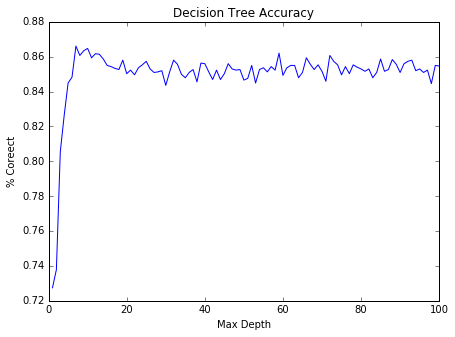

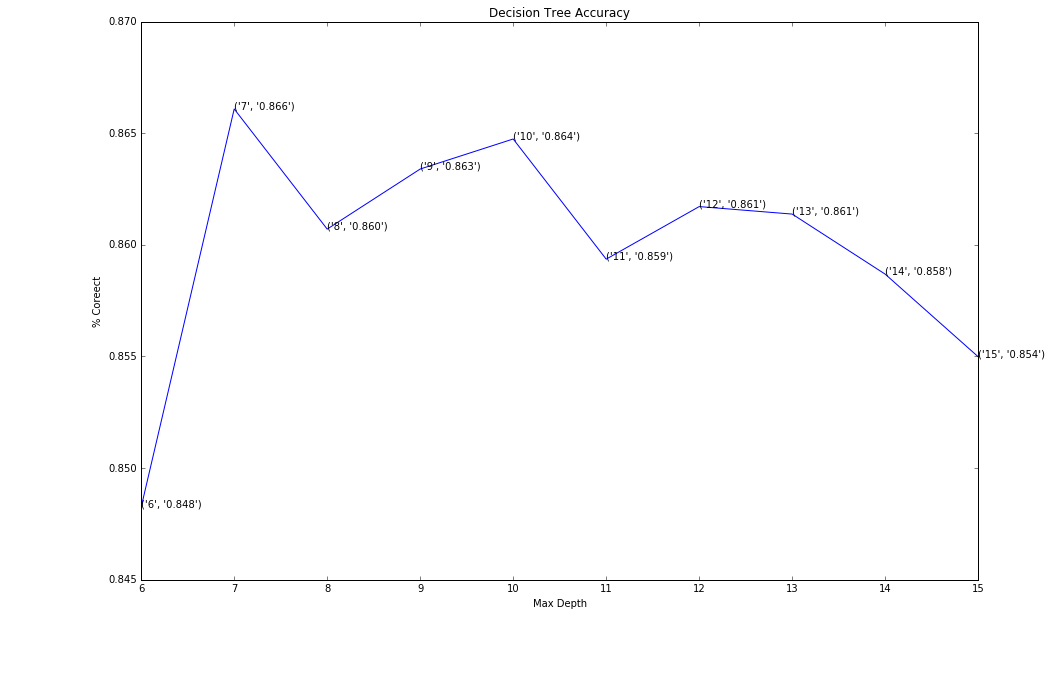

In [72]:
np.random.seed(0)

n_features = 100
x, y = datasets.make_classification(10000, n_features=n_features, n_informative=10, random_state=5)
# split train and test dataset
training = np.random.choice([True, False], p=[0.7, 0.3], size=len(y))
accuracies = []

# create accuracies array according to different depth
for i in np.arange(1, n_features+1):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x[training], y[training])
    preds = dt.predict(x[~training])
    accuracies.append((preds == y[~training]).mean())
    
# making plots
f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(1, n_features+1), accuracies)
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Coreect")
ax.set_xlabel("Max Depth")

# We can find that the accuracy arrive highest values acounrd depth 10 and then decrease
f, ax = plt.subplots(figsize=(15,10))
ax.plot(range(1, n_features+1)[5:15], accuracies[5:15])
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Coreect")
ax.set_xlabel("Max Depth")
for i,j in zip(range(1, n_features+1)[:20], accuracies[:20]):
    ax.annotate(('{:.5}'.format(str(i)),'{:.5}'.format(str(j))), xy=(i,j))


<Container object of 93 artists>

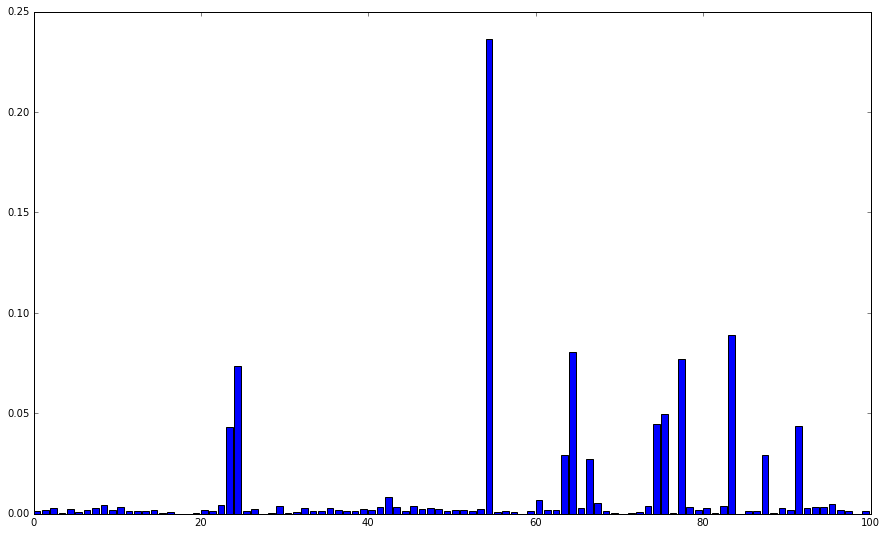

In [73]:
# Drawing important feacture plot
important_index = dt.feature_importances_ != 0
y_important = dt.feature_importances_[important_index]
x_important = np.arange(len(important_index))[important_index]

f, ax = plt.subplots(figsize=(15,9))
ax.bar(x_important, y_important)

### Draw Picture

In [2]:
clf = DecisionTreeClassifier()
iris = datasets.load_iris()

clf = clf.fit(iris.data, iris.target)

# def plot_dt(model):
#     dotfile = open("tree.dot", 'w')
#     tree.export_graphviz(model, out_file=dotfile)
#     system("dot -Tpng tree.dot -o tree.png")

# plot_dt(clf)


str_buffer = StringIO()
tree.export_graphviz(clf, out_file=str_buffer)
graphme = pydotplus.graph_from_dot_data(str_buffer.getvalue())
print(type(graphme))
graphme.write_pdf("tree.pdf")



<class 'pydotplus.graphviz.Dot'>


InvocationException: GraphViz's executables not found

In [37]:
pydot.graph_from_dot_data?

In [44]:
import pydotp

In [9]:
pydotplus.Dot.write_png?

Object `pydotplus.Dot.write_png` not found.


In [14]:
pydotplus.graphviz.Dot.write?